In [9]:
from model import Data
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importación de dataset local
SMOTE_DATA = "./sample_data/smote_data.csv"

smote_data = pd.read_csv(SMOTE_DATA)
smote_data

,fecha_de_muestreo,estaciones,ph,temperatura_c,color_upc,turbiedad_unt,solidos_totales_mg_sst_l,solidos_suspendidos_totales,solidos_disueltos_mg_sd_l,demanda_bioquimica_de_oxigeno,...,fosforo_total_mg_p_l,fosfatos_mg_po4_l,sulfatos_mg_so4_l,cadmio_total_mg_cd_l,cromo_total_mg_cr_l,niquel_total_mg_ni_l,plomo_total_mg_pb_l,coliformes_totales_nmp_100,coliformes_fecales_nmp_100,contaminacion_metalica
0,1990-01-10 00:00:00,ANTES INTERCEPTOR SUR,7.200000,22.022321,135.280069,134.044514,358.000000,271.000000,87.000000,33.000000,...,0.268925,0.010000,18.000000,0.205591,0.165057,0.000000,0.000000,2.410000e+05,2.410000e+05,bajo
1,1990-01-10 00:00:00,PUENTE HORMIGUERO,7.200000,22.022321,135.280069,134.044514,464.000000,360.000000,104.000000,39.000000,...,0.268925,0.010000,21.000000,0.205591,0.165057,0.000000,0.000000,2.410000e+05,2.410000e+04,bajo
2,1990-01-10 00:00:00,ANTES RIO OVEJAS,6.700000,22.022321,135.280069,134.044514,143.000000,65.000000,78.000000,2.100000,...,0.268925,0.010000,18.000000,0.205591,0.165057,0.075543,0.148743,2.410000e+04,2.410000e+07,bajo
3,1990-01-10 00:00:00,PASO DE LA BOLSA,7.300000,22.022321,135.280069,134.044514,359.000000,171.000000,88.000000,33.000000,...,0.268925,0.010000,16.000000,0.205591,0.165057,0.000000,0.148743,2.410000e+04,2.410000e+05,bajo
4,1990-01-10 00:00:00,PASO DE LA BALSA,7.100000,22.022321,135.280069,134.044514,380.000000,293.000000,87.000000,1.000000,...,0.268925,0.010000,22.000000,0.205591,0.165057,0.075543,0.148743,2.410000e+05,9.550000e+03,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,NaN,NaN,6.252666,21.875387,123.718354,10.846690,110.557491,4.839721,105.717770,1.025244,...,0.054880,0.008524,22.100767,0.005688,0.026681,0.015218,0.016010,2.540418e+01,2.300000e+01,viable
4632,NaN,NaN,6.709747,21.544489,31.779564,25.853932,101.989380,21.473450,80.515930,1.962285,...,0.039256,0.049655,14.084199,0.018765,0.092736,0.043718,0.032776,2.400000e+03,2.400000e+02,viable
4633,NaN,NaN,7.001152,16.028793,44.913620,8.670055,105.861792,25.929744,79.932048,1.702303,...,0.146672,0.038184,23.271339,0.001000,0.003000,0.005000,0.010000,2.409942e+03,2.409942e+03,viable
4634,NaN,NaN,7.370166,15.973757,55.131213,36.429556,193.243074,61.787979,131.455095,3.031491,...,0.100807,0.022895,29.093524,0.001000,0.003000,0.005000,0.010000,2.410000e+04,2.410000e+04,viable


In [11]:
smote_data[Data.ESTACIONES].value_counts()

estaciones
JUANCHITO                130
MEDIACANOA               128
PUERTO ISAACS            126
VIJES                    125
PASO DEL COMERCIO        124
PASO DE LA TORRE         124
YOTOCO                   121
PUENTE HORMIGUERO        119
ANTES RIO OVEJAS         115
ANTES RIO TIMBA          115
ANTES SUAREZ             114
PASO DE LA BOLSA         113
PUENTE GUAYABAL          113
LA VICTORIA              113
PASO DE LA BALSA         112
ANTES INTERCEPTOR SUR    112
RIOFRIO                  112
ANACARO                  112
PUENTE LA VIRGINIA       111
ANTES INTERCEPTOR          3
PUENTE  HORMIGUERO         3
PASO DE  LA TORRE          3
PASO DE  LA BOLSA          3
PASO DE  LA BALSA          3
Name: count, dtype: int64

In [12]:
# Asegúrate de instalar la librería mlxtend si aún no la tienes instalada
# pip install mlxtend

from mlxtend.frequent_patterns import apriori, association_rules
# import pandas as pd
# import matplotlib.pyplot as plt

# # Cargar tu dataset
# data = pd.read_csv('ruta_a_tu_archivo.csv')

# Convertir las columnas numéricas en binario usando umbrales
data_binarized = smote_data.copy()

# Aplicar umbrales simples para convertir los valores numéricos en 0 y 1
for column in data_binarized.select_dtypes(include=['float64', 'int']):
    median = data_binarized[column].median()
    data_binarized[column] = data_binarized[column].apply(lambda x: 1 if x > median else 0)

# Preprocesar el dataset para las reglas de asociación, transformando las columnas categóricas en variables dummy
data_dummies = pd.get_dummies(data_binarized.drop(columns=[Data.CONTAMINACION_METALICA]))

# Aplicar el algoritmo Apriori con un soporte mínimo de 0.1
frequent_itemsets = apriori(data_dummies, min_support=0.1, use_colnames=True)

# Generar las reglas de asociación con un umbral mínimo de confianza del 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Ordenar las reglas por confianza
rules_sorted = rules.sort_values(by='confidence', ascending=False)
# print(rules_sorted.head())

# Visualizar las reglas de asociación más relevantes
plt.figure(figsize=(12, 6))
plt.scatter(rules_sorted['support'], rules_sorted['confidence'], alpha=0.6, c=rules_sorted['lift'], cmap='viridis')
plt.title('Reglas de Asociación - Soporte vs Confianza (Binarized Data)')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.colorbar(label='Lift')
plt.show()

c:\Users\overd\Saved Games\Computacion\Hardware\Concurrency\uc\taller-i\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 58.9 GiB for an array with shape (340863, 5, 4636) and data type object

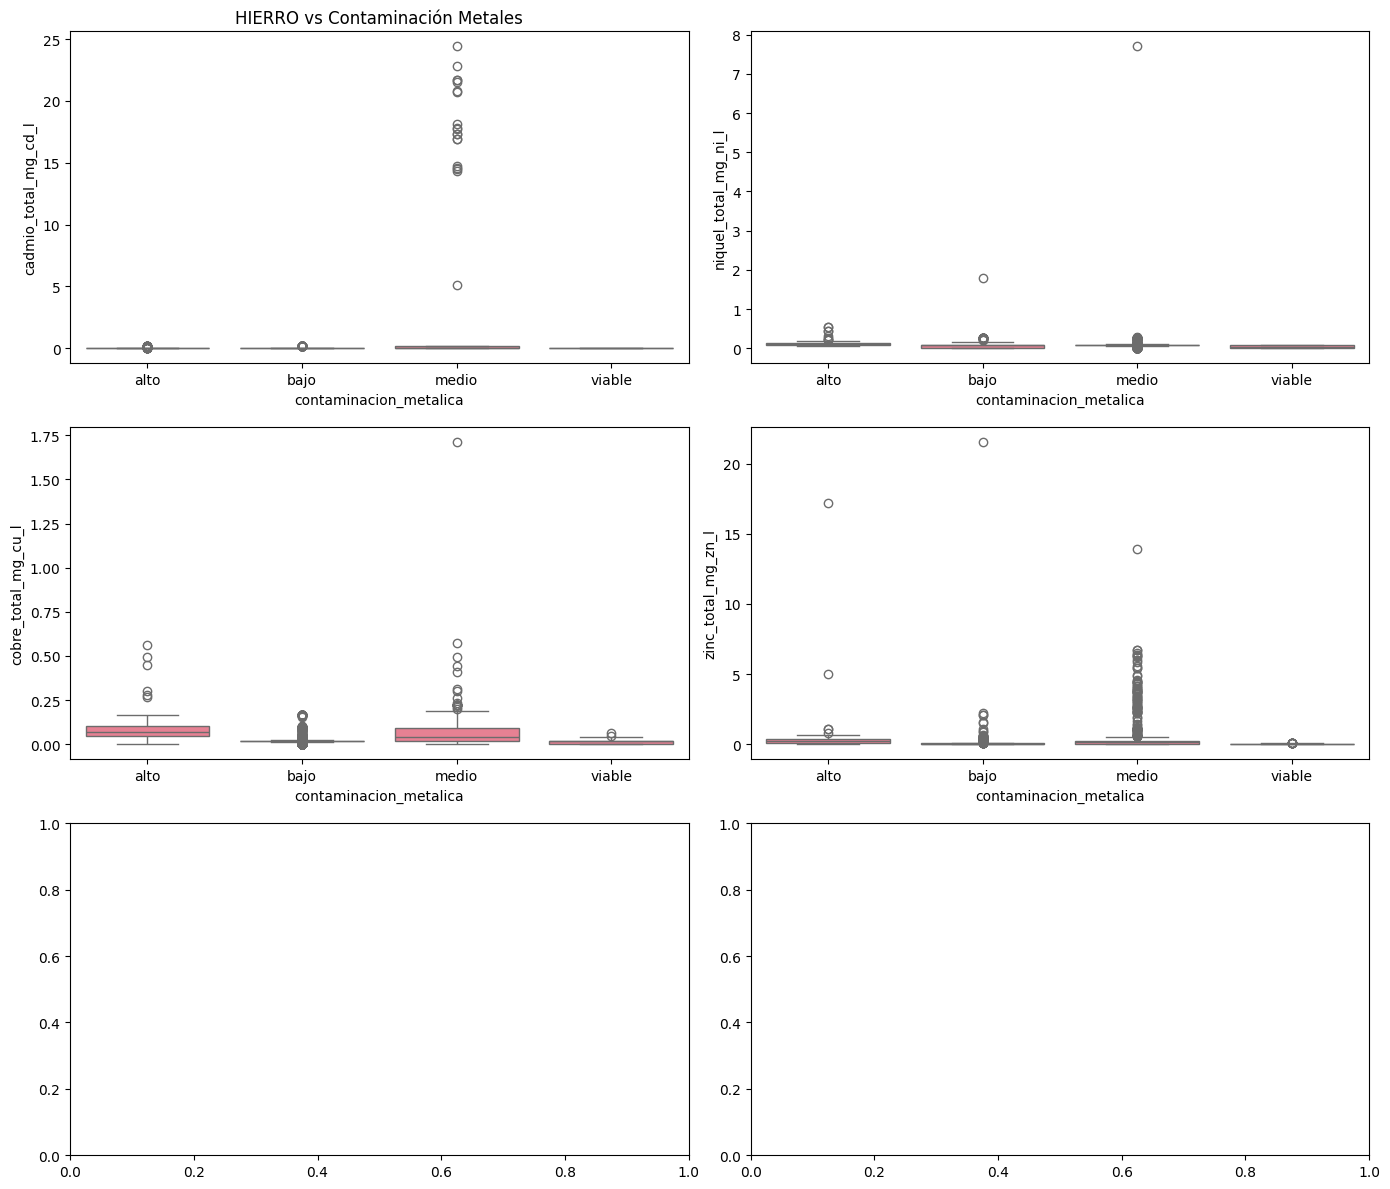

In [ ]:
# Empezamos la generación de gráficos



